###### Introduction

In this notebook, we're going to analyze the exit surveys from employees of [Department of Education, Training and Employment](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)(DETE) and the [Technical and Further Eduction](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) (TAFE) institute in Queensland, Australia. We'll be analyzing these datasets combinedly to get the answer for following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

So, in order answer our question we'll be going to perform different data cleaning and data wrangling techniques to get most out of the data. We'll be combining the data from both the source to get the overall idea of exit behavior of the employees. How dissatisfaction plays a role in the employee exit.

**Summary of the results**

We got an overall idea of longer employeed workers tend to show their dissatisfaction compared to the newer one's. This shows that they are more vocal towards any work related dissatisfaction than other employees. Supported by the data as 80.88% of Employees with Veteran(worked for the company more than 10 years) tag show some kind of dissatisfaction towards their work. This percentage is almost twice compared to employees with new(worked for less than 3 years at the company) tag whose dissatisfaction level is at 47.67%. Our conclusion of longer the year of employment more employees are vocal towards work dissatisfaction is also supported by the increase in dissatisfaction percentage with longer employment.  

Note: You can find the data from the above link.

###### Data
Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

`ID`: An id used to identify the participant of the survey

`SeparationType`: The reason why the person's employment ended

`Cease Date`: The year or month the person's employment ended

`DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

`Record ID`: An id used to identify the participant of the survey

`Reason for ceasing employment`: The reason why the person's employment ended

`LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
# load standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [7]:
dete_survey = pd.read_csv('data/dete_survey.csv')
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

There are 18 bool datatype columns out of 56. Leave one int column which is ID column rest consists of categorical values. As we'll only be working with relevant columns for our analysis. So, We'll remove unecessary columns in next step. For now let's explore the another data source.

In [16]:
tafe_survey = pd.read_csv('data/tafe_survey.csv',encoding='cp1252')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

We're using encoding attribute of pandas.read_csv() method as the this data has different encoding than default 'utf-8' encoding. We can see some similar columns that we can across from dete dataset but with different naming used. Here also we'll be only considering relevant columns for our analysis in next step.

######  Identifying missing values and removing unecessary columns

After some research, we figure out following are the irrelevant columns for our analysis.

In [4]:
# these columns are related to job dissatisfaction, so removing
dete_df.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [17]:
# these columns also contain columns irrelevant to our analysis
tafe_survey.columns[17:66]

Index(['Main Factor.     Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positi

In [10]:
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see from above dataset that missing values are entered as `Not Stated`. So we'll be using another attribute of pandas.read_csv method `na_values` to state these as also null values. Let's read the datasets with above attribute again.

In [11]:
# reading the data again with na_values attribute in pandas
dete_survey = pd.read_csv('data/dete_survey.csv',
                          na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
# dropping the irrelevant columns from both the datasets
dete_survey_updated =dete_survey.drop(columns=dete_survey.columns[28:49],
                             axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [18]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66],
                             axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null int64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors. 

###### Clean Column Names
- we're planning to combine both the datasets, so we have to standardize the columns names as both of the datasets consists of same column with different name. 

In [19]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [20]:
# rename in the columns
dete_survey_updated.columns = dete_survey_updated.columns.\
                    str.replace(' ','_').str.replace('/','_')\
                    .str.replace('\s+','').\
                    str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [21]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [22]:
import warnings

warnings.filterwarnings('ignore')

# we're only considering following columns for our analysis
cols = ['Record ID','CESSATION YEAR','Reason for ceasing employment',
        'Gender.     What is your Gender?','CurrentAge.     Current Age',
        'Employment Type.     Employment Type',
'Classification.     Classification',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)',

'LengthofServiceCurrent. Length of Service at current workplace (in years)',

'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction'        
]

tafe_survey_updated = tafe_survey.loc[:,cols]
tafe_survey_updated.head(2).T

,0,1
Record ID,634133009996094000,634133654064531000
CESSATION YEAR,2010,2010
Reason for ceasing employment,Contract Expired,Retirement
Gender. What is your Gender?,NaN,NaN
CurrentAge. Current Age,NaN,NaN
Employment Type. Employment Type,NaN,NaN
Classification. Classification,NaN,NaN
LengthofServiceOverall. Overall Length of Service at Institute (in years),1-2,NaN
LengthofServiceCurrent. Length of Service at current workplace (in years),1-2,NaN
Contributing Factors. Dissatisfaction,NaN,-


In [23]:
rename_cols = ['id','cease_date','separationtype','gender','age',
              'employment_status','position','institute_service',
              'role_service','Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction']

# renaming the columns
tafe_survey_updated.columns = rename_cols
tafe_survey_updated.columns

Index(['id', 'cease_date', 'separationtype', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'role_service',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction'],
      dtype='object')

In [24]:
tafe_survey_updated.sample(5)

,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,role_service,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
314,634576230941875000,2011.0,Contract Expired,NaN,NaN,NaN,NaN,1-2,1-2,NaN,NaN
552,634837985192031000,2012.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,11-20,11-20,NaN,NaN
431,634686807219219000,2012.0,Termination,NaN,NaN,NaN,NaN,Less than 1 year,Less than 1 year,NaN,NaN
33,634201137431070000,2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,NaN,-,-
386,634617650635469000,2012.0,Resignation,NaN,NaN,NaN,NaN,3-4,3-4,Contributing Factors. Dissatisfaction,-


What we did in this section:
- selected only relevant columns for our analysis purpose
- rename the columns and made it standardized for the purpose of combining the two datasets

###### Filter the data
As we're looking for the answer about any causes employee exit due to job dissatisfaction. So, we'll be looking for `Resignatin` in the `separationtype`.

In [25]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

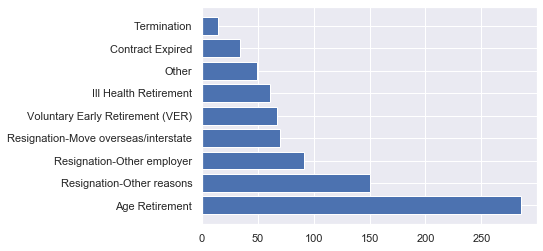

In [26]:
separation_type = dete_survey_updated['separationtype'].value_counts()
separation_index = separation_type.index.values
separation_value = separation_type.values

plt.barh(separation_index,separation_value)
plt.show()

In [27]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [28]:
# library for regular expression
import re

# we're trying to use regular expression to extract the valuee
# containing separationtype as any form of Resignation
dete_resignations = dete_survey_updated[dete_survey_updated
                ['separationtype'].apply(lambda val: 
                True if re.search(r'\bResignation\b',
                                  val)else False)]

In [29]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [30]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated[
    'separationtype'].apply(lambda val: True if 
                re.search(r'\bResignation\b',str(val)) else False)]
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [31]:
tafe_resignations.sample(10)

,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,role_service,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
103,634275489048845000,2010.0,Resignation,NaN,NaN,NaN,NaN,Less than 1 year,Less than 1 year,Contributing Factors. Dissatisfaction,Job Dissatisfaction
101,634274542281501000,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,Contributing Factors. Dissatisfaction,-
659,634998528620661000,2013.0,Resignation,NaN,NaN,NaN,NaN,1-2,1-2,-,-
530,634811041501719000,2012.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,-,-
508,634779998192656000,2012.0,Resignation,NaN,NaN,NaN,NaN,1-2,1-2,-,Job Dissatisfaction
423,634683154020000000,2012.0,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,-,-
383,634600285342656000,2011.0,Resignation,NaN,NaN,NaN,NaN,Less than 1 year,Less than 1 year,-,-
193,634431906734219000,2011.0,Resignation,NaN,NaN,NaN,NaN,5-6,5-6,-,-
237,634515603225000000,2011.0,Resignation,NaN,NaN,NaN,NaN,1-2,1-2,Contributing Factors. Dissatisfaction,Job Dissatisfaction
630,634940601409024000,2013.0,Resignation,NaN,NaN,NaN,NaN,5-6,5-6,-,-


###### Verify the data
- verify the data for any major inconsistencies..
- detecting outliers and handling it with care

In [32]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [33]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [34]:
# extracting the year of employment
tafe_resignations['cease_date'].apply(
        lambda val: str(val).split('.')[0]).astype('float')

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
        ...  
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64

In [35]:
# extracting the year of employment
dete_resignations['cease_date'].apply(
        lambda val: str(val)[-4:]).astype('float')

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [37]:
# converting cease_date
dete_resignations['cease_date']= dete_resignations['cease_date'] \
            .apply(lambda val: str(val)[-4:]).astype('float')

# converting dete_start_date
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date']\
            .apply(lambda val: str(val).split('.')[0]).astype('float')

# converting cease_date from tafe_survey
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].apply(
        lambda val: str(val).split('.')[0]).astype('float')

In [38]:
# check the values after conversion
dete_resignations['cease_date'].value_counts().sort_index(
                                        ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [39]:
tafe_resignations['cease_date'].value_counts().sort_index(
                                    ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

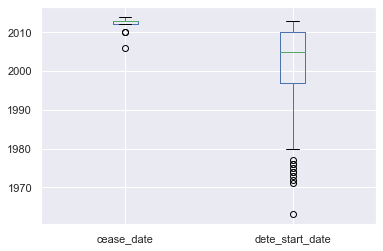

In [40]:
dete_resignations.boxplot(column=['cease_date','dete_start_date'])

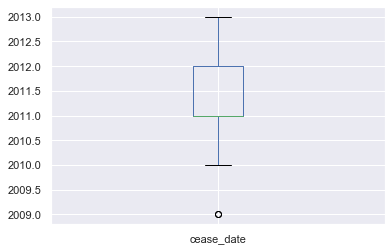

In [41]:
tafe_resignations.boxplot(column=['cease_date'])

Data looks fine. Doesn't contain any problematic values.

###### Create a new column

In [42]:
dete_resignations['institute_service'] = \
            dete_resignations['cease_date'] - \
            dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


###### Identifying dissatisfied employees

In [43]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [44]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 11 columns):
id                                           702 non-null int64
cease_date                                   695 non-null float64
separationtype                               701 non-null object
gender                                       0 non-null float64
age                                          0 non-null float64
employment_status                            0 non-null float64
position                                     0 non-null float64
institute_service                            596 non-null object
role_service                                 596 non-null object
Contributing Factors. Dissatisfaction        437 non-null object
Contributing Factors. Job Dissatisfaction    437 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 60.5+ KB


In [45]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [46]:
tafe_resignations['Contributing Factors. Dissatisfaction'].\
                value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [47]:
cols =['Contributing Factors. Dissatisfaction',
      'Contributing Factors. Job Dissatisfaction']
# creating a copy to work on..
tafe_resignations_dis = tafe_resignations[cols].copy()
# applying the update_vals function to the dataFrame
tafe_resignations_dis = tafe_resignations_dis.applymap(update_vals)
#checking after the changes
tafe_resignations_dis['Contributing Factors. Dissatisfaction'].\
                    value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [48]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].\
            value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
tafe_resignations_dis['Contributing Factors. Job Dissatisfaction']\
            .value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [50]:
tafe_resignations_dis.sample(10)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
679,False,False
693,False,False
16,NaN,NaN
228,False,False
294,True,True
40,True,False
69,False,False
563,False,False
642,False,False
36,False,False


In [51]:
tafe_resignations_dis.any(axis=1,skipna=False).value_counts(dropna=False)

False    241
True      91
NaN        8
dtype: int64

In [52]:
tafe_resignations['dissatisfied'] = tafe_resignations_dis.any(
                                            axis=1,skipna=False)    

In [53]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Let's do the same for dete_resignations data

In [54]:
# columns to consider for the process
cols = ['job_dissatisfaction',
'dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition','lack_of_job_security',
'work_location','employment_conditions','work_life_balance',
'workload']
dete_r_temp = dete_resignations[cols].copy()

In [55]:
dete_r_temp = dete_r_temp.applymap(update_vals)
dete_resignations['dissatisfied'] = dete_r_temp.any(axis=1,
                                                   skipna=False)

In [56]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

True    311
Name: dissatisfied, dtype: int64

###### Combining the data 

In [58]:
# creating new column to distinguish between two datasets
dete_resignations['institute'] = 'DETE'

tafe_resignations['institute'] = 'TAFE'

In [59]:
combined = dete_resignations.append(tafe_resignations,
                                   ignore_index=True)

In [60]:
combined

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,...,role_service,role_start_date,separationtype,south_sea,study_travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,36-40,NaN,True,False,2012.0,Primary,2005.0,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,41-45,Education Queensland,True,False,2012.0,NaN,1994.0,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,31-35,NaN,True,False,2012.0,Secondary,2009.0,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,46-50,NaN,False,False,2012.0,NaN,1997.0,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,31-35,NaN,False,False,2012.0,Secondary,2009.0,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,-,-,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,...,5-6,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,-,-,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,-,-,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,...,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,-,-,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,...,1-2,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# removing columns with greater than 500 NaN values
combined_updated = combined.dropna(thresh=500,axis=1)

In [62]:
combined_updated

,cease_date,dissatisfied,id,institute,institute_service,separationtype
0,2012.0,True,4,DETE,7,Resignation-Other reasons
1,2012.0,True,6,DETE,18,Resignation-Other reasons
2,2012.0,True,9,DETE,3,Resignation-Other reasons
3,2012.0,True,10,DETE,15,Resignation-Other employer
4,2012.0,True,12,DETE,3,Resignation-Move overseas/interstate
...,...,...,...,...,...,...
646,2013.0,False,635065973820625000,TAFE,5-6,Resignation
647,2013.0,False,635066785175197000,TAFE,1-2,Resignation
648,2013.0,False,635067716405666000,TAFE,NaN,Resignation
649,2013.0,False,635070442972541000,TAFE,5-6,Resignation


###### Clean the Service Column

In [63]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We'll categories the service category as below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [64]:
combined_updated['institute_service'].astype('str').str.extract(
        r'(\d+)',expand=False).value_counts()

1     159
3      83
5      56
7      34
11     30
0      20
6      17
20     17
4      16
2      14
9      14
13      8
8       8
15      7
10      6
17      6
22      6
14      6
12      6
16      5
18      5
24      4
23      4
19      3
39      3
32      3
21      3
26      2
25      2
36      2
28      2
30      2
35      1
27      1
34      1
31      1
42      1
49      1
41      1
33      1
38      1
29      1
Name: institute_service, dtype: int64

In [65]:
combined_updated['institute_service_updated'] =combined_updated \
        ['institute_service'].astype('str').str.extract(r'(\d+)',
                                    expand=False).astype('float')

In [66]:
def service_category(val):
    if val < 3:
        return 'New'
    elif val>2 and val <7:
        return 'Experienced'
    elif val>6 and val<11:
        return 'Established'
    elif pd.isnull(val):
        return np.nan        
    else:
        return 'Veteran'